In [ ]:
import zipfile
import os

zip_path = "dataset.zip"  # ← change this to your actual zip file name
extract_to = "dataset"         # ← this is the folder it will unzip into

# Make sure the folder exists
if not os.path.exists(extract_to):
    os.makedirs(extract_to)

# Unzip the file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to)

print(" Unzipped successfully!")

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

model = Sequential()

# Use an explicit Input layer to define the input shape
model.add(Input(shape=(64, 64, 3)))  # Define input shape here

model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Binary output

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

print("Model built and compiled!")



Model built and compiled!


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input

# Define the model
model = Sequential([
    Input(shape=(64, 64, 3)),  # Explicitly define input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification (Blocked vs NotBlocked)
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary to check its architecture
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 29, 29, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │       1,605,760 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,625,281 (6.20 MB)

 Trainable params: 1,625,281 (6.20 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Define paths
train_path = "D:/jupyter_nbk_project/dataset/train"
valid_path = "D:/jupyter_nbk_project/dataset/valid"
test_path = "D:/jupyter_nbk_project/dataset/test"

# Data augmentation for training; normalization for all
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Data generators
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

valid_generator = valid_datagen.flow_from_directory(
    valid_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Check class distribution
print("Train classes:", train_generator.class_indices)
print("Validation classes:", valid_generator.class_indices)
print("Test classes:", test_generator.class_indices)

# Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),  # Added deeper layer
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),          # Slightly larger dense layer
    Dropout(0.6),                            # Increased dropout to combat overfitting
    Dense(2, activation='softmax')          # 2 classes
])

# Compile
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Early stopping
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=25,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size,
    callbacks=[early_stopping]
)

# Evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f" Test Loss: {test_loss:.4f}, Test Accuracy: {test_acc:.4f}")


Found 6752 images belonging to 2 classes.
Found 255 images belonging to 2 classes.
Found 37 images belonging to 2 classes.
Train classes: {'Blocked': 0, 'NotBlocked': 1}
Validation classes: {'Blocked': 0, 'NotBlocked': 1}
Test classes: {'Blocked': 0, 'NotBlocked': 1}
Epoch 1/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 251s 1s/step - accuracy: 0.9292 - loss: 0.1984 - val_accuracy: 0.9955 - val_loss: 0.0109
Epoch 2/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 894s 4s/step - accuracy: 0.9730 - loss: 0.0798 - val_accuracy: 0.9911 - val_loss: 0.0115
Epoch 3/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 250s 1s/step - accuracy: 0.9843 - loss: 0.0450 - val_accuracy: 0.9955 - val_loss: 0.0105
Epoch 4/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 316s 1s/step - accuracy: 0.9865 - loss: 0.0396 - val_accuracy: 0.9955 - val_loss: 0.0119
Epoch 5/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 359s 2s/step - accuracy: 0.9876 - loss: 0.0353 - val_accuracy: 0.9955 - val_loss: 0.0118
Epoch 6/25
211/211 ━━━━━━━━━━━━━━━━━━━━ 309s 1s/step - accuracy: 0.9913 - loss: 0.0263 

In [6]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess image
img_path = r'D:/jupyter_nbk_project/dataset/test/Blocked/Blocked-66-_png.rf.585d06d02fc58ee4c396fc5d4d34f0a3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize

# Predict
prediction = model.predict(img_array)

# Print result
print("Prediction:", "Blocked" if prediction[0][0] > 0.5 else "Not Blocked")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step
Prediction: Blocked


In [7]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load and preprocess image
img_path = 'D:/jupyter_nbk_project/dataset/valid/NotBlocked/Not_Blocked-166-_png.rf.d09dbe49b0f7b6c01acb4cc1496500d3.jpg'
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize

# Predict
prediction = model.predict(img_array)

# Print result
print("Prediction:", "Blocked" if prediction[0][0] > 0.5 else "Not Blocked")



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
Prediction: Not Blocked


In [8]:
from tensorflow.keras.preprocessing import image
import numpy as np

# Load an image and prepare it for prediction
img_path = 'D:/jupyter_nbk_project/dataset/test/Blocked/Blocked-98-_png.rf.7c0c80a4d698497e834b8d38759a7c7a.jpg'  # Replace with your image path
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)  # Add batch dimension
img_array = img_array / 255.0  # Normalize

# Predict
prediction = model.predict(img_array)

# Print result
print("Prediction:", "Blocked" if prediction[0][0] > 0.5 else "Not Blocked")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
Prediction: Blocked


In [20]:
model.save("cnn_model.h5")

In [9]:
import json

# Save class indices (e.g., {'Blocked': 0, 'NotBlocked': 1})
with open("class_indices.json", "w") as f:
    json.dump(train_generator.class_indices, f)



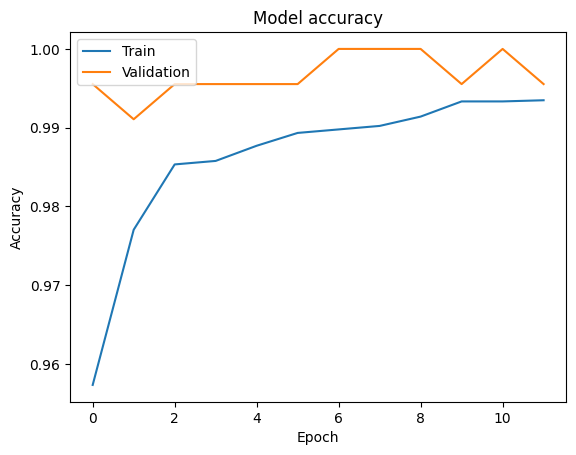

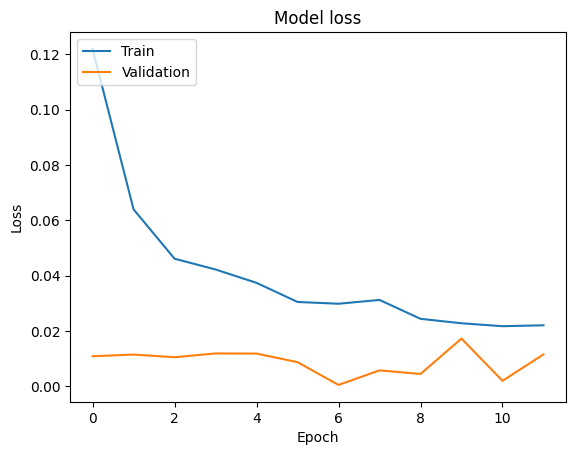

In [10]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [17]:
plt.show()


In [11]:
model.save('blocked_vs_not_blocked_model.keras')

In [12]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_path = "D:/jupyter_nbk_project/dataset/train"

train_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

print("Train classes:", train_generator.class_indices)


Found 6752 images belonging to 2 classes.
Train classes: {'Blocked': 0, 'NotBlocked': 1}


In [ ]:
do not execute further

In [13]:
import os
print(os.getcwd())


D:\jupyter_nbk_project\dataset


In [20]:
# Check a batch of labels from the train generator
x_batch, y_batch = next(train_generator)
print(f"Label shape: {y_batch.shape}")  # Should be (batch_size, 3) for 3 classes


Label shape: (32, 3)


In [22]:
print(train_generator.class_indices)

{'.ipynb_checkpoints': 0, 'Blocked': 1, 'NotBlocked': 2}


In [23]:
images, labels = next(train_generator)
print(labels) 

[[0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [14]:
# Check the shape of target labels in the train, valid, and test generators
# Accessing one batch of data and printing the target (labels) shape

train_batch = next(train_generator)
valid_batch = next(valid_generator)
test_batch = next(test_generator)

# The labels are in the second part of the batch
print("Shape of training labels:", train_batch[1].shape)  # (batch_size, num_classes)
print("Shape of validation labels:", valid_batch[1].shape)
print("Shape of test labels:", test_batch[1].shape)


Shape of training labels: (32, 3)
Shape of validation labels: (32, 2)
Shape of test labels: (32, 3)


In [15]:
rain_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # For binary classification
)

valid_generator = test_val_datagen.flow_from_directory(
    valid_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # For binary classification
)

test_generator = test_val_datagen.flow_from_directory(
    test_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'  # For binary classification
)

Found 6753 images belonging to 3 classes.
Found 255 images belonging to 2 classes.
Found 37 images belonging to 3 classes.


In [16]:
# Check class distributions after fixing the dataset
print("Training dataset class distribution:", train_generator.class_indices)
print("Validation dataset class distribution:", valid_generator.class_indices)
print("Test dataset class distribution:", test_generator.class_indices)

Training dataset class distribution: {'.ipynb_checkpoints': 0, 'Blocked': 1, 'NotBlocked': 2}
Validation dataset class distribution: {'Blocked': 0, 'NotBlocked': 1}
Test dataset class distribution: {'.ipynb_checkpoints': 0, 'Blocked': 1, 'NotBlocked': 2}


In [17]:
import os
import shutil

# Define paths for the datasets
train_path = "D:/jupyter_nbk_project/dataset/train"
valid_path = "D:/jupyter_nbk_project/dataset/valid"
test_path = "D:/jupyter_nbk_project/dataset/test"

# Remove .ipynb_checkpoints folders in all dataset directories
for dataset_path in [train_path, valid_path, test_path]:
    checkpoint_path = os.path.join(dataset_path, '.ipynb_checkpoints')
    if os.path.exists(checkpoint_path):
        shutil.rmtree(checkpoint_path)

print("Removed .ipynb_checkpoints folder from all datasets.")


Removed .ipynb_checkpoints folder from all datasets.


In [24]:
# Recheck class distributions
print("Training dataset class distribution:", train_generator.class_indices)
print("Validation dataset class distribution:", valid_generator.class_indices)
print("Test dataset class distribution:", test_generator.class_indices)


Training dataset class distribution: {'Blocked': 0, 'NotBlocked': 1}
Validation dataset class distribution: {'Blocked': 0, 'NotBlocked': 1}
Test dataset class distribution: {'Blocked': 0, 'NotBlocked': 1}


In [23]:
import os
import shutil

def remove_checkpoints(dataset_path):
    for root, dirs, files in os.walk(dataset_path):
        if '.ipynb_checkpoints' in dirs:
            checkpoint_path = os.path.join(root, '.ipynb_checkpoints')
            shutil.rmtree(checkpoint_path)  # Removes the .ipynb_checkpoints folder

# Define paths for your datasets
train_path = "D:/jupyter_nbk_project/dataset/train"
valid_path = "D:/jupyter_nbk_project/dataset/valid"
test_path = "D:/jupyter_nbk_project/dataset/test"

# Remove .ipynb_checkpoints folder from all datasets
remove_checkpoints(train_path)
remove_checkpoints(valid_path)
remove_checkpoints(test_path)

# Verify the class distribution again
print("Training dataset class distribution:", os.listdir(train_path))
print("Validation dataset class distribution:", os.listdir(valid_path))
print("Test dataset class distribution:", os.listdir(test_path))


Training dataset class distribution: ['Blocked', 'NotBlocked']
Validation dataset class distribution: ['Blocked', 'NotBlocked']
Test dataset class distribution: ['Blocked', 'NotBlocked']


In [21]:
import tensorflow as tf
print(tf.__version__)


2.19.0


In [9]:
print(model.input_shape)


(None, 224, 224, 3)


In [24]:
train_generator.class_indices



{'Blocked': 0, 'NotBlocked': 1}

In [25]:
print(history.history['accuracy'])
print(history.history['val_accuracy'])

[0.9558101296424866, 0.96875, 0.9736646413803101, 1.0, 0.9800624847412109, 0.90625, 0.9825918674468994, 1.0, 0.9811040163040161, 1.0]
[0.9866071343421936, 0.9866071343421936, 0.9910714030265808, 0.9910714030265808, 0.9955357313156128, 0.9955357313156128, 0.9955357313156128, 0.9910714030265808, 0.9955357313156128, 0.9955357313156128]
